# Weekly Forecast

In [1]:
# Required imports
import pandas as pd
import matplotlib.pyplot as plt

# Modeling Package
from neuralprophet import NeuralProphet

In [2]:
df = pd.read_csv('weekly10.csv')

In [3]:
df.dropna(inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3161 entries, 0 to 3160
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DATE     3161 non-null   object 
 1   WGS10YR  3161 non-null   float64
dtypes: float64(1), object(1)
memory usage: 74.1+ KB


In [5]:
df.columns = ['ds', 'y']
list(df.columns.values)

['ds', 'y']

In [6]:
df.head()

,ds,y
0,1962-01-05,4.03
1,1962-01-12,4.06
2,1962-01-19,4.11
3,1962-01-26,4.10
4,1962-02-02,4.10


In [7]:
df.tail()

,ds,y
3156,2022-07-01,3.07
3157,2022-07-08,2.96
3158,2022-07-15,2.95
3159,2022-07-22,2.94
3160,2022-07-29,2.75


In [8]:
df.describe()

,y
count,3161.000000
mean,5.922050
std,2.992316
min,0.550000
25%,3.910000
50%,5.730000
75%,7.670000
max,15.680000


In [9]:
m = NeuralProphet(
    n_changepoints=24, 
    num_hidden_layers=3)    

In [10]:
metrics = m.fit(df, freq="W")

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.968% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 139


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.56E-01, min: 2.29E-02


  0%|          | 0/137 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.56E-01, min: 1.20E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 2.33E-01
Epoch[139/139]: 100%|█| 139/139 [00:15<00:00,  9.02it/s, SmoothL1Loss=0.00151, M


In [11]:
future = m.make_future_dataframe(df=df, periods=6)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.968% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W


In [12]:
forecast = m.predict(df=future)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 83.333% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W
INFO - (NP.df_utils._infer_frequency) - Major frequency W-SUN corresponds to 83.333% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W


In [13]:
forecast.head()

,ds,y,yhat1,residual1,trend,season_yearly
0,2022-07-31,None,1.673935,NaN,1.630402,0.043534
1,2022-08-07,None,1.659958,NaN,1.628473,0.031485
2,2022-08-14,None,1.645421,NaN,1.626544,0.018877
3,2022-08-21,None,1.631042,NaN,1.624616,0.006426
4,2022-08-28,None,1.617273,NaN,1.622687,-0.005414


### Plotting

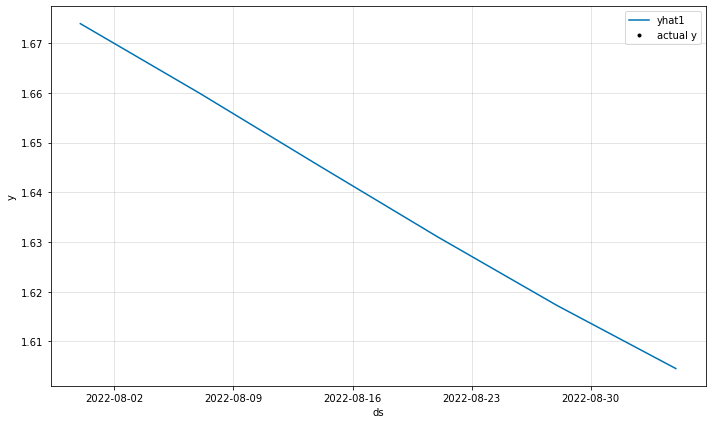

In [14]:
fig_forecast = m.plot(forecast)

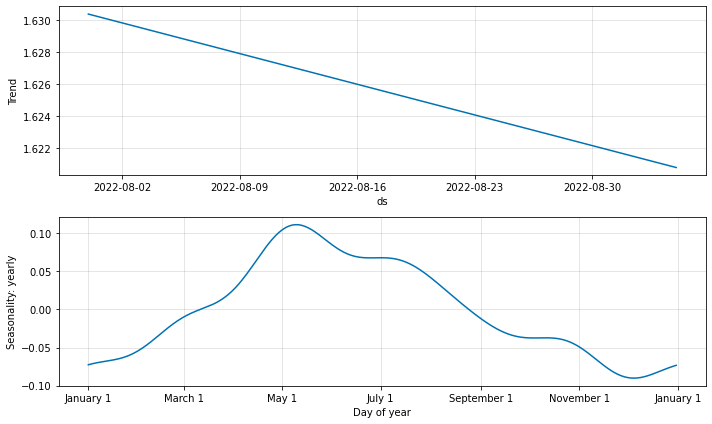

In [15]:
fig_comp = m.plot_components(forecast)

#### February, April, June, August, October, and December has downward seasonality.

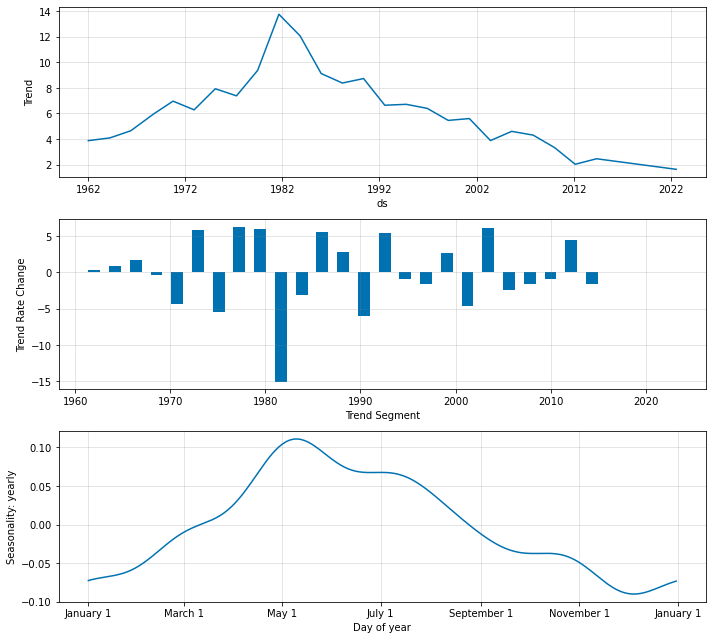

In [16]:
fig_param = m.plot_parameters()

## Validation

In [17]:
# Manual Split
m = NeuralProphet()
df_train, df_test = m.split_df(df, valid_p=0.2)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.968% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as W-FRI


In [18]:
train_metrics = m.fit(df_train)
test_metrics = m.test(df_test)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.96% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 148


  0%|          | 0/135 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.50E-02, min: 5.30E+00


  0%|          | 0/135 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 9.50E-02, min: 2.06E-01
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 9.66E-02
Epoch[148/148]: 100%|█| 148/148 [00:13<00:00, 11.24it/s, SmoothL1Loss=0.00235, M
INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.842% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - W-FRI
INFO - (NP.forecaster._evaluate) - Validation metrics:    SmoothL1Loss    MAE   RMSE
1         0.003  0.660  0.798


In [19]:
# Builtin Function

m = NeuralProphet()
metrics = m.fit(df_train, validation_df=df_test)

INFO - (NP.df_utils._infer_frequency) - Major frequency W-FRI corresponds to 99.96% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as W-FRI
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 148


  0%|          | 0/135 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.14E-02, min: 1.32E+00


  0%|          | 0/135 [00:00<?, ?it/s]

INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 8.14E-02, min: 2.09E+00
INFO - (NP.forecaster._init_train_loader) - lr-range-test selected learning rate: 8.72E-02
Epoch[148/148]: 100%|█| 148/148 [00:13<00:00, 11.17it/s, SmoothL1Loss=0.00235, M


Text(0.5, 1.0, 'Model Loss (MAE) with Weekly Frequency')

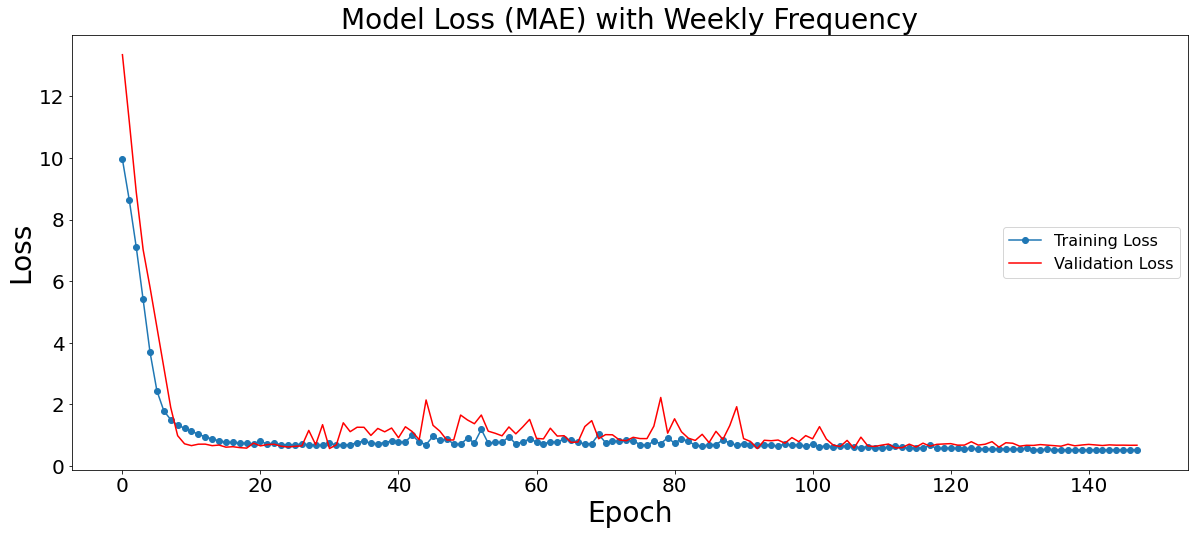

In [20]:
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(metrics["MAE"], '-o', label="Training Loss")  
ax.plot(metrics["MAE_val"], '-r', label="Validation Loss")
ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("Epoch", fontsize=28)
ax.set_ylabel("Loss", fontsize=28)
ax.set_title("Model Loss (MAE) with Weekly Frequency", fontsize=28)